In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# path to database
hi_database_path ="../sqlalchemy-challenge/resources/hawaii.sqlite"

In [6]:
# create engine to communicate
engine = create_engine(f"sqlite:///{hi_database_path}")
conn = engine.connect()

In [7]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [34]:
# Save references to each table
measurement=Base.classes.measurement

In [35]:
# Save references to each table
station=Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [36]:
# display measurement 
measurement.__dict__

mappingproxy({'__table__': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.measurement'> at 2a0bdf1de50>,
              '__init__': <function __init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2a0bdf3ccc0>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2a0bdf3cd60>,
              'date': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2a0bdf3ce00>,
              'prcp': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2a0bdf3cea0>,
              'tobs': <sqlalc

In [37]:
# display station
station.__dict__

mappingproxy({'__table__': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.station'> at 2a0bdf44090>,
              '__init__': <function __init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2a0bdf443b0>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2a0bdf44450>,
              'name': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2a0bdf444f0>,
              'latitude': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2a0bdf44590

# Exploratory Climate Analysis

In [13]:
# Design query to show the most recent date

query_1=session.query(measurement.date).order_by(measurement.date.desc()).first()
print(query_1)

('2017-08-23',)


In [14]:
# # Calculate the date 1 year ago from the last data point in the database - from '2017-08-23' using datetime
last_twelve_months = dt.date(2017,8,23) - dt.timedelta(days=365)
print(last_twelve_months)

2016-08-23


In [15]:
# creating query for precipitation from last year 
prcp=session.query(measurement.date,measurement.prcp).filter(measurement.date >= last_twelve_months).order_by(measurement.date).all()



prcp_df=pd.DataFrame(prcp)
prcp_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [16]:
# drop NaN values 
prcp_df=prcp_df.dropna()
prcp_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


In [17]:
# setting "date" as index
prcp_df.set_index('date').head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


C:\Users\jenni\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


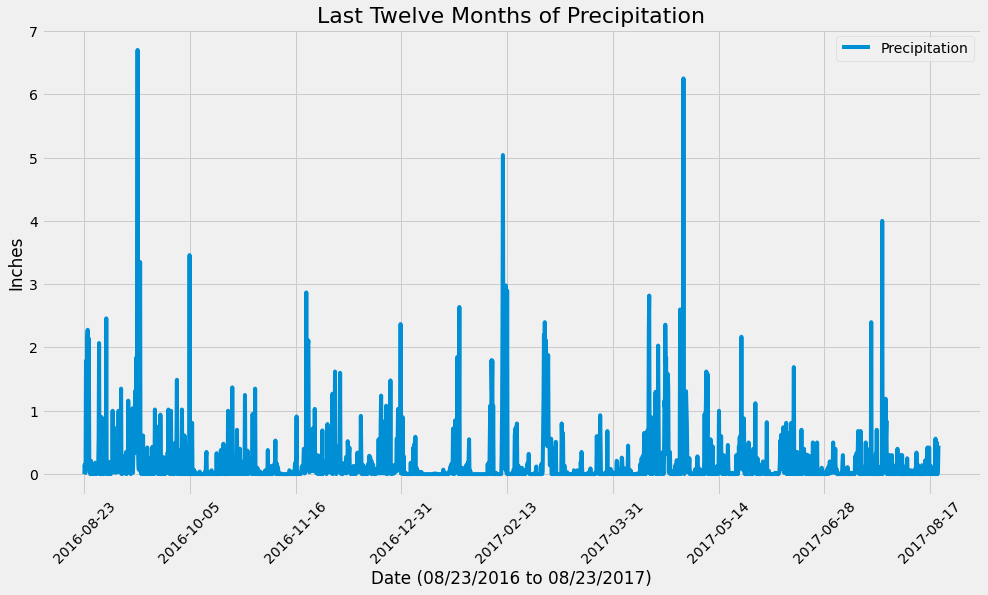

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot('date','prcp', figsize=(15,8), rot=45)
plt.xlabel("Date (08/23/2016 to 08/23/2017)")
plt.ylabel("Inches")
plt.title("Last Twelve Months of Precipitation", size=22)
plt.legend(['Precipitation'], loc='best')
plt.tight_layout

plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
station_count_query=session.query(measurement).group_by(measurement.station).count()
print(f"There are {station_count_query} stations available in this dataset")

There are 9 stations available in this dataset


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations=session.query(measurement.station,func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.tobs).desc())

print("Active stations shown in descending order:")
print()
for station, count in active_stations:
    print("Station",station,"had",count,"temperature observations." )


Active stations shown in descending order:

Station USC00519281 had 2772 temperature observations.
Station USC00519397 had 2724 temperature observations.
Station USC00513117 had 2709 temperature observations.
Station USC00519523 had 2669 temperature observations.
Station USC00516128 had 2612 temperature observations.
Station USC00514830 had 2202 temperature observations.
Station USC00511918 had 1979 temperature observations.
Station USC00517948 had 1372 temperature observations.
Station USC00518838 had 511 temperature observations.


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

most_active=active_stations[0][0]
temp=session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station==most_active).all()

print("Station",most_active,"is the most active.")
print("The lowest, highest and average temps for the most active station are",temp,",respectively.")
# "The highest temp",temp, ". " "Average temp is", temp, ".")




Station USC00519281 is the most active.
The lowest, highest and average temps for the most active station are [(54.0, 85.0, 71.66378066378067)] ,respectively.


In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
most_active=active_stations[0][0]
active_year=session.query(measurement.station,measurement.date, measurement.tobs).filter(measurement.station==most_active).filter(measurement.date>last_twelve_months).order_by(measurement.date)

active_year_df=pd.DataFrame(active_year)
active_year_df.head()

,station,date,tobs
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0


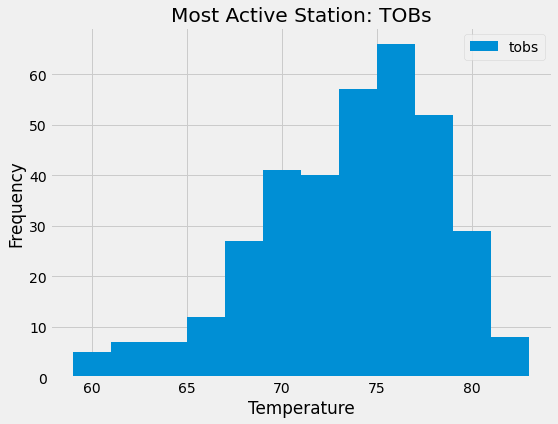

In [24]:
# plot results as histogram
active_year_df.plot(kind='hist',bins=12,figsize=(8,6))
plt.xlabel("Temperature")
plt.title("Most Active Station: TOBs")

plt.show()

## Bonus Challenge Assignment

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# Trip is for 2012-03-01 to 2012-03-06, using previous year's data


trip_start=dt.date(2011,3,1)
trip_end=dt.date(2011,3,6)
trip_lastyear=dt.timedelta(days=365)
t_min_avg_max=(calc_temps((trip_start-trip_lastyear),(trip_end-trip_lastyear)))
t_min_avg_max

[(63.0, 68.91304347826087, 74.0)]

In [27]:
# convert results into pandas
t_min_avg_max_df=pd.DataFrame(t_min_avg_max, columns=["T_MIN","T_AVG","T_MAX"])
# round T_AVG to 2 decimal places
t_min_avg_max_df["T_AVG"]=t_min_avg_max_df["T_AVG"].round(2)
t_min_avg_max_df



,T_MIN,T_AVG,T_MAX
0,63.0,68.91,74.0


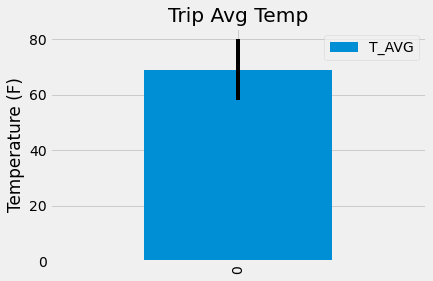

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

t_min_avg_max_df.plot(y="T_AVG",yerr=(t_min_avg_max_df["T_MAX"]-t_min_avg_max_df["T_MIN"]), kind='bar')

plt.title("Trip Avg Temp")
plt.ylabel("Temperature (F)")


plt.show()


In [42]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
select=measurement.station, station.name,func.sum(measurement.prcp),station.latitude,station.longitude,station.elevation

trip_by_station=session.query(*select).filter(measurement.station == station.station).filter(measurement.date >= trip_start).filter(measurement.date<=trip_end).group_by(station.station).order_by(func.sum(measurement.prcp).desc()).all()

trip_by_station_df=pd.DataFrame(trip_by_station, columns=["station","name","prcp","latitude","longitude","elevation"])
trip_by_station_df

,station,name,prcp,latitude,longitude,elevation
0,USC00519281,"WAIHEE 837.5, HI US",3.74,21.45167,-157.84889,32.9
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2.60,21.52130,-157.83740,7.0
2,USC00513117,"KANEOHE 838.1, HI US",2.60,21.42340,-157.80150,14.6
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2.44,21.33556,-157.71139,19.5
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",2.33,21.49920,-158.01110,306.6
5,USC00516128,"MANOA LYON ARBO 785.2, HI US",1.69,21.33310,-157.80250,152.4
6,USC00519397,"WAIKIKI 717.2, HI US",1.41,21.27160,-157.81680,3.0
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",0.63,21.31520,-157.99920,0.9
8,USC00517948,"PEARL CITY, HI US",NaN,21.39340,-157.97510,11.9


In [44]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]